In [150]:
# !pip install pymysql
# !pip install plotly

In [151]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns # For creating plots
# import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from matplotlib import rcParams

In [152]:
# db_host = ''
# username = ''
# user_pass = ''
# db_name = 'project'

# conn = create_engine('mysql+pymysql://'+username+':'+user_pass+'@'+db_host+'/'+db_name)

df=pd.read_csv('cleaned_dataset.csv')

In [153]:
query = "select * from telecom_churn_data"

In [154]:
data = pd.read_sql(query,conn)

In [155]:
data.shape

(4617, 21)

In [156]:
data.columns = ['State','Account_Length','Area_Code','Phone','International_Plan'
                ,'VMail_Plan',
                'VMail_Message','Day_Mins','Day_Calls','Day_Charge','Eve_Mins','Eve_Calls',
                'Eve_Charge','Night_Mins','Night_Calls',
                'Night_Charge','International_Mins','International_calls','International_Charge'
                ,'CustServ_Calls','Churn'];
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
State                   4617 non-null object
Account_Length          4617 non-null object
Area_Code               4617 non-null object
Phone                   4617 non-null object
International_Plan      4617 non-null object
VMail_Plan              4617 non-null object
VMail_Message           4617 non-null object
Day_Mins                4617 non-null object
Day_Calls               4617 non-null object
Day_Charge              4617 non-null object
Eve_Mins                4617 non-null object
Eve_Calls               4617 non-null object
Eve_Charge              4617 non-null object
Night_Mins              4617 non-null object
Night_Calls             4617 non-null object
Night_Charge            4617 non-null object
International_Mins      4617 non-null object
International_calls     4617 non-null object
International_Charge    4617 non-null object
CustServ_Calls          4617 non-null 

In [247]:
data.head()

,State,Account_Length,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,16,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [158]:
# data.sort_values(['Phone'], ascending=True)
data.drop("Phone",axis=1,inplace=True)
data.drop("Area_Code",axis=1,inplace=True)
data.head()

,State,Account_Length,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [159]:
data.Account_Length=data.Account_Length.astype('int64')
# data.Area_Code=data.Area_Code.astype('int64')
data.VMail_Message=data.VMail_Message.astype('int64')
data.Day_Mins=data.Day_Mins.astype('float64')
data.Day_Calls=data.Day_Calls.astype('int64')
data.Day_Charge=data.Day_Charge.astype('float64')
data.Eve_Mins=data.Eve_Mins.astype('float64')
data.Eve_Calls=data.Eve_Calls.astype('int64')
data.Eve_Charge=data.Eve_Charge.astype('float64')
data.Night_Mins=data.Night_Mins.astype('float64')
data.Night_Calls=data.Night_Calls.astype('int64')
data.Night_Charge=data.Night_Charge.astype('float64')
data.International_Mins=data.International_Mins.astype('float64')
data.International_calls=data.International_calls.astype('int64')
data.International_Charge=data.International_Charge.astype('float64')
data.CustServ_Calls=data.CustServ_Calls.astype('int64')

In [160]:
# data.isnull().sum()

In [161]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data.State = enc.fit_transform(data.State)
data.VMail_Plan = enc.fit_transform(data.VMail_Plan)
data.International_Plan = enc.fit_transform(data.International_Plan)
data.Churn = enc.fit_transform(data.Churn)
# data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
# data['Churn'].replace(to_replace='No', value=0, inplace=True)

In [162]:
data.head()

,State,Account_Length,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,16,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 19 columns):
State                   4617 non-null int64
Account_Length          4617 non-null int64
International_Plan      4617 non-null int64
VMail_Plan              4617 non-null int64
VMail_Message           4617 non-null int64
Day_Mins                4617 non-null float64
Day_Calls               4617 non-null int64
Day_Charge              4617 non-null float64
Eve_Mins                4617 non-null float64
Eve_Calls               4617 non-null int64
Eve_Charge              4617 non-null float64
Night_Mins              4617 non-null float64
Night_Calls             4617 non-null int64
Night_Charge            4617 non-null float64
International_Mins      4617 non-null float64
International_calls     4617 non-null int64
International_Charge    4617 non-null float64
CustServ_Calls          4617 non-null int64
Churn                   4617 non-null int64
dtypes: float64(8), int64(11)
memory usag

In [164]:
data.isnull().sum().sum()


0

In [165]:
df_dummies = pd.get_dummies(data)
df_dummies.head()

,State,Account_Length,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,16,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# EDA

In [166]:
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
import io
# import plotly.offline as py#visualization
# py.init_notebook_mode(connected=True)#visualization
# import plotly.graph_objs as go#visualization
# import plotly.tools as tls#visualization
# import plotly.figure_factory as ff#visualization

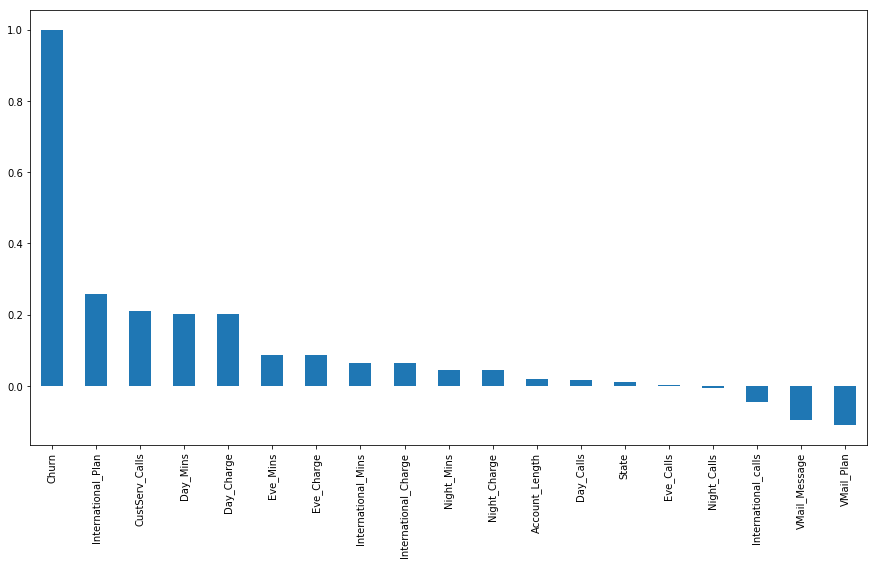

In [167]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [168]:
# data.sort_values(['Day_Charge'], ascending=True)
data.describe()

,State,Account_Length,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,26.041585,100.645224,0.096600,0.267706,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035,0.142084
std,14.790361,39.597194,0.295444,0.442812,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019,0.349174
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000,0.000000
50%,26.000000,100.000000,0.000000,0.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.000000,127.000000,0.000000,1.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000,0.000000
max,50.000000,243.000000,1.000000,1.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


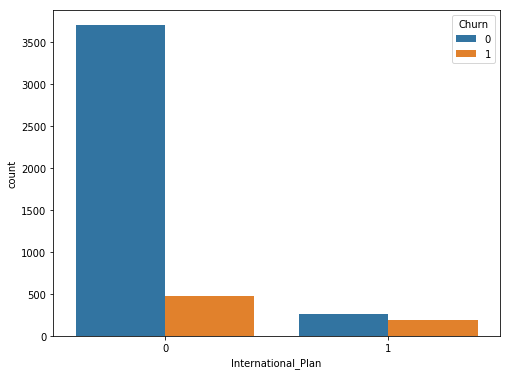

In [169]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x='International_Plan', hue='Churn', data=data);

Text(0.5, 1.0, '# of Customers by their tenure')

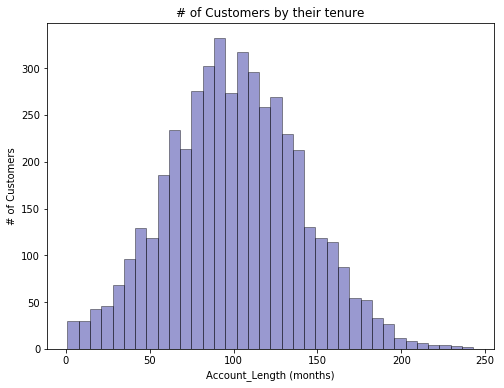

In [170]:
ax = sns.distplot(data['Account_Length'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Account_Length (months)')
ax.set_title('# of Customers by their tenure')

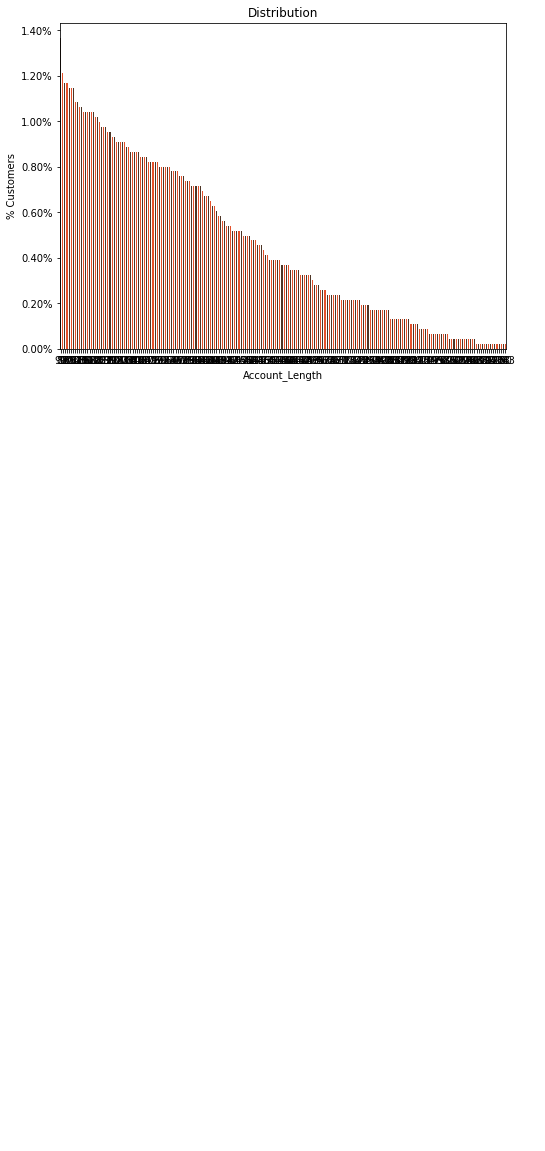

In [171]:
colors = ['#4D3425','#E4512B']
ax = (data['Account_Length'].value_counts()*100.0 /len(data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Account_Length')
ax.set_ylabel('% Customers')
ax.set_title('Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

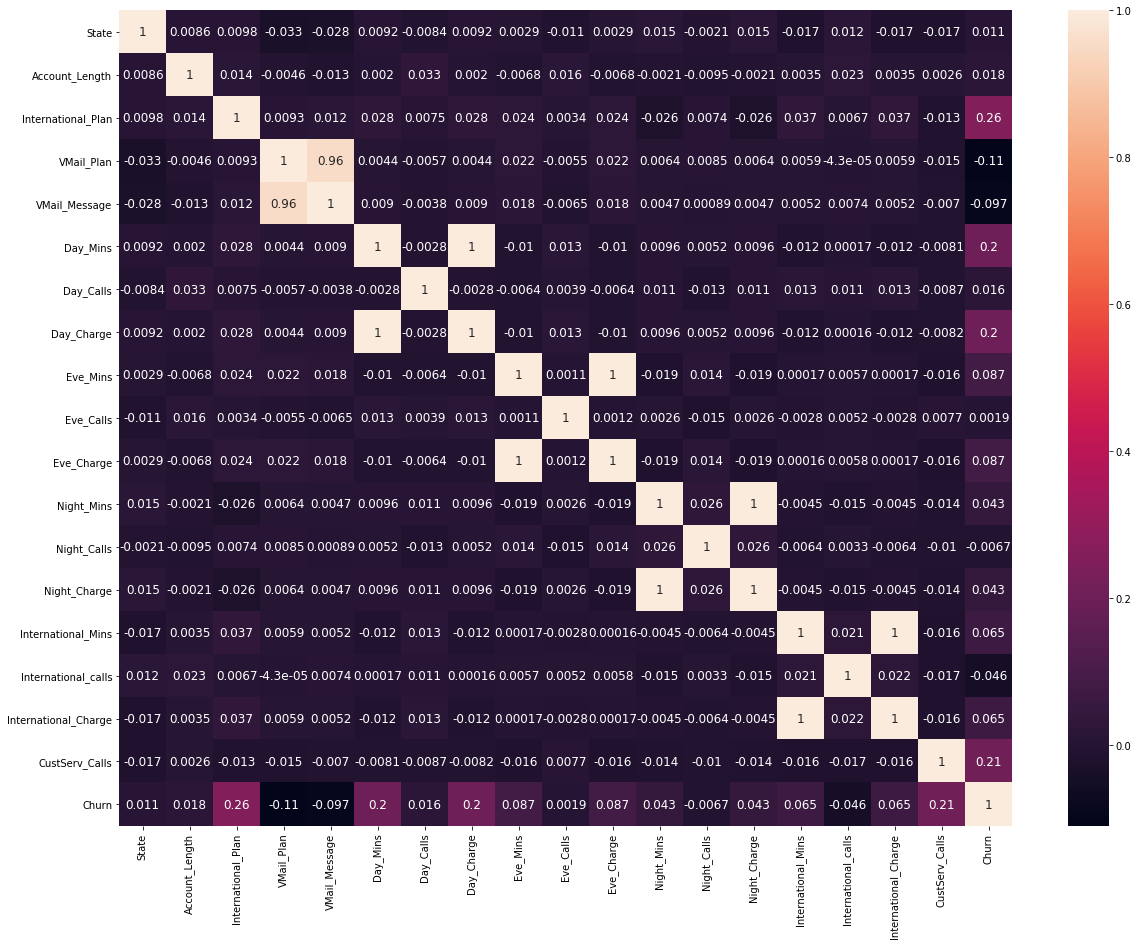

In [172]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [173]:
from collections import Counter
col=data.columns
for i in col:
    print('Mode of--',i,'-- Occurance of',stats.mode(data[i])[0],'is',stats.mode(data[i])[1])

Mode of-- State -- Occurance of [49] is [149]
Mode of-- Account_Length -- Occurance of [90] is [63]
Mode of-- International_Plan -- Occurance of [0] is [4171]
Mode of-- VMail_Plan -- Occurance of [0] is [3381]
Mode of-- VMail_Message -- Occurance of [0] is [3381]
Mode of-- Day_Mins -- Occurance of [154.] is [10]
Mode of-- Day_Calls -- Occurance of [102] is [108]
Mode of-- Day_Charge -- Occurance of [26.18] is [10]
Mode of-- Eve_Mins -- Occurance of [169.9] is [10]
Mode of-- Eve_Calls -- Occurance of [105] is [111]
Mode of-- Eve_Charge -- Occurance of [14.25] is [15]
Mode of-- Night_Mins -- Occurance of [186.2] is [10]
Mode of-- Night_Calls -- Occurance of [105] is [115]
Mode of-- Night_Charge -- Occurance of [9.66] is [19]
Mode of-- International_Mins -- Occurance of [9.8] is [81]
Mode of-- International_calls -- Occurance of [3] is [925]
Mode of-- International_Charge -- Occurance of [2.65] is [81]
Mode of-- CustServ_Calls -- Occurance of [1] is [1651]
Mode of-- Churn -- Occurance of 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21e7cd30>,
      dtype=object)

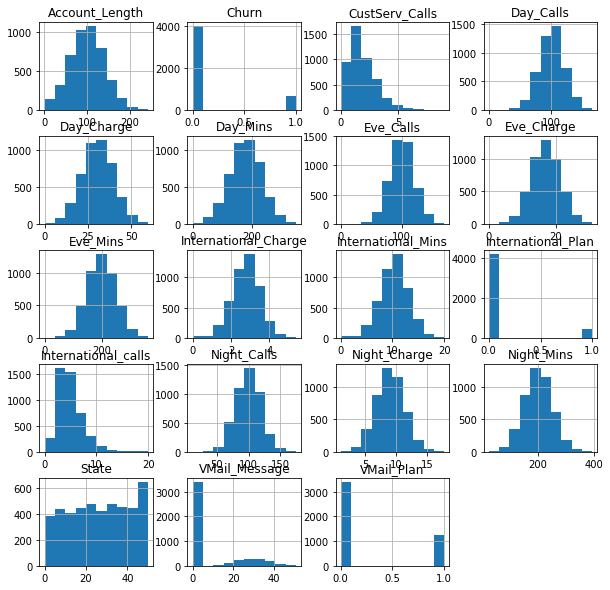

In [174]:
data.hist(figsize=(10,10))

In [272]:
# X = data.loc[:,['State','Account_Length','Area_Code','International_Plan', 'VMail_Plan', 'VMail_Message', 
#                 'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins',
#                 'Night_Calls','Night_Charge','International_Mins','International_calls',
#                 'International_Charge','CustServ_Calls']
#             ]
X = data.loc[:,['Account_Length','International_Plan', 'VMail_Plan', 'VMail_Message', 
                 'Day_Charge', 'Eve_Charge'
                ,'Night_Charge',
                'International_Charge','CustServ_Calls']
            ]
y = data.Churn            
X.shape

(4617, 9)

# Basic Model implementation

# Random Forest

In [273]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [274]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                  random_state=10)

In [275]:
model_rM= RandomForestClassifier()

In [276]:
model_rM.fit(X_train,y_train)
y_predict_rm = model_rM.predict(X_test)

/Users/sankhadeepchatterjee/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [277]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict_rm))
pd.crosstab(y_test, y_predict_rm)

0.9357864357864358


col_0,0,1
Churn,,
0,1186,14
1,75,111


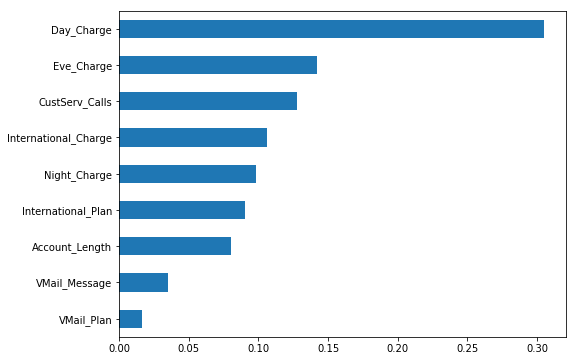

In [278]:
importances = model_rM.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

# Logistic Regression

In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [280]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
y_predict_lr=model_lr.predict(X_test)

/Users/sankhadeepchatterjee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [281]:
print(classification_report(y_test,y_predict_lr))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1200
           1       0.43      0.15      0.22       186

   micro avg       0.86      0.86      0.86      1386
   macro avg       0.65      0.56      0.57      1386
weighted avg       0.82      0.86      0.83      1386



In [282]:
from sklearn.metrics import confusion_matrix

In [283]:
confusion_matrix(y_test,y_predict_lr)

array([[1164,   36],
       [ 159,   27]])

In [284]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict_lr))
pd.crosstab(y_test, y_predict)

0.8593073593073594


col_0,0,1
Churn,,
0,1166,34
1,156,30


In [285]:
print(classification_report(y_test,y_predict_lr))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1200
           1       0.43      0.15      0.22       186

   micro avg       0.86      0.86      0.86      1386
   macro avg       0.65      0.56      0.57      1386
weighted avg       0.82      0.86      0.83      1386



In [286]:
y_predict_prob = model_lr.predict_proba(X_test)
pd.DataFrame(y_predict_prob)

,0,1
0,0.881892,0.118108
1,0.692315,0.307685
2,0.844010,0.155990
3,0.345760,0.654240
4,0.560026,0.439974
5,0.937272,0.062728
6,0.939843,0.060157
7,0.902468,0.097532
8,0.752103,0.247897
9,0.354067,0.645933


In [287]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import model_selection


In [288]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

In [289]:
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_result = model_selection.cross_val_score(model,X_train,y_train, cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

/Users/sankhadeepchatterjee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sankhadeepchatterjee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sankhadeepchatterjee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sankhadeepchatterjee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sankhadeepchatterjee/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

LR 0.8638105339601727
KNN 0.8885773802698467
CART 0.8950827504491075
RF 0.9340757940603142
SVM 0.8585502427091694


In [290]:
from sklearn.externals import joblib
joblib.dump(model_lr, "Telecom-churn.ml")

['Telecom-churn.ml']

 inputs:  'Account_Length','International_Plan', 'VMail_Plan', 'VMail_Message'
                , 'Day_Charge','Eve_Charge'
                ,'Night_Charge',
                'International_Charge','CustServ_Calls'

In [314]:
loaded_model = joblib.load("Telecom-churn.ml")

# result = loaded_model.score(y_predict)
y_predict_churn = loaded_model.predict([[200,0,0,2,20.0,45,10.0,150.0,5]])
print(y_predict_churn)

[1]
